In [ ]:
# https://webdevblog.ru/podhody-lemmatizacii-s-primerami-v-python/
#Сравнение NLTK, TextBlob, spaCy, Pattern и Stanford CoreNLP
#Давайте запустим лемматизацию, используя 5 пакетов для следующих предложений, и сравним вывод

!pip install wordnet


In [ ]:
# NLTK
import nltk
import pprint
import string
import wordnet
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tag import pos_tag
from nltk.tokenize import word_tokenize
from pprint import pprint

sentence = """Following mice attacks, caring farmers were marching to Delhi for better living conditions.
Delhi police on Tuesday fired water cannons and teargas shells at protesting farmers as they tried to
break barricades with their cars, automobiles and tractors."""
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

# Init the Wordnet Lemmatizer
lemmatizer = WordNetLemmatizer()
# Lemmatize Single Word
print(lemmatizer.lemmatize("bats"))

print(lemmatizer.lemmatize("are"))

print(lemmatizer.lemmatize("feet"))

# Define the sentence to be lemmatized
#sentence = "The striped bats are hanging on their feet for best"
# Tokenize: Split the sentence into words
word_list = nltk.word_tokenize(sentence)
print(word_list)

# Lemmatize list of words and join
lemmatized_output = ' '.join([lemmatizer.lemmatize(w) for w in word_list])
print(lemmatized_output)

print(lemmatizer.lemmatize("stripes", 'v'))
print(lemmatizer.lemmatize("stripes", 'n'))

print(nltk.pos_tag(['feet']))
print(nltk.pos_tag(nltk.word_tokenize(sentence)))

def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

# 1. Init Lemmatizer
lemmatizer = WordNetLemmatizer()
# 2. Lemmatize Single Word with the appropriate POS tag
word = 'feet'
print(lemmatizer.lemmatize(word, get_wordnet_pos(word)))
# 3. Lemmatize a Sentence with the appropriate POS tag
#sentence = "The striped bats are hanging on their feet for best"
print([lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in nltk.word_tokenize(sentence)])

nltk.download('punkt')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
res = string.punctuation
res1 = nltk.word_tokenize(sentence)

pprint(" ".join([lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in nltk.word_tokenize(sentence) if w not in string.punctuation]))
# ('Following mouse attack care farmer be march to Delhi for well living '
#  'condition Delhi police on Tuesday fire water cannon and teargas shell at '
#  'protest farmer a they try to break barricade with their car automobile and '
#  'tractor')
# Spacy
import spacy
import sys

#nlp = spacy.load('en', disable=['parser', 'ner'])
nlp = spacy.load("en_core_web_sm")
doc = nlp(sentence)
pprint(" ".join([token.lemma_ for token in doc]))
# ('follow mice attack , care farmer be march to delhi for good living condition '
#  '. delhi police on tuesday fire water cannon and teargas shell at protest '
#  'farmer as -PRON- try to break barricade with -PRON- car , automobile and '
#  'tractor .')


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


bat
are
foot
['Following', 'mice', 'attacks', ',', 'caring', 'farmers', 'were', 'marching', 'to', 'Delhi', 'for', 'better', 'living', 'conditions', '.', 'Delhi', 'police', 'on', 'Tuesday', 'fired', 'water', 'cannons', 'and', 'teargas', 'shells', 'at', 'protesting', 'farmers', 'as', 'they', 'tried', 'to', 'break', 'barricades', 'with', 'their', 'cars', ',', 'automobiles', 'and', 'tractors', '.']
Following mouse attack , caring farmer were marching to Delhi for better living condition . Delhi police on Tuesday fired water cannon and teargas shell at protesting farmer a they tried to break barricade with their car , automobile and tractor .
strip
stripe
[('feet', 'NNS')]
[('Following', 'VBG'), ('mice', 'NN'), ('attacks', 'NNS'), (',', ','), ('caring', 'VBG'), ('farmers', 'NNS'), ('were', 'VBD'), ('marching', 'VBG'), ('to', 'TO'), ('Delhi', 'NNP'), ('for', 'IN'), ('better', 'JJR'), ('living', 'NN'), ('conditions', 'NNS'), ('.', '.'), ('Delhi', 'NNP'), ('police', 'NN'), ('on', 'IN'), ('Tues

NameError: ignored

In [ ]:
# TextBlob
# Define function to lemmatize each word with its POS tag
!pip install textblob
from textblob import TextBlob, Word
def lemmatize_with_postag(sentence):
    sent = TextBlob(sentence)
    tag_dict = {"J": 'a',
                "N": 'n',
                "V": 'v',
                "R": 'r'}
    words_and_tags = [(w, tag_dict.get(pos[0], 'n')) for w, pos in sent.tags]
    lemmatized_list = [wd.lemmatize(tag) for wd, tag in words_and_tags]
    return " ".join(lemmatized_list)
pprint(lemmatize_with_postag(sentence))
# ('Following mouse attack care farmer be march to Delhi for good living '
#  'condition Delhi police on Tuesday fire water cannon and teargas shell at '
#  'protest farmer a they try to break barricade with their car automobile and '
#  'tractor')



('Following mouse attack care farmer be march to Delhi for good living '
 'condition Delhi police on Tuesday fire water cannon and teargas shell at '
 'protest farmer a they try to break barricade with their car automobile and '
 'tractor')


ModuleNotFoundError: ignored

In [ ]:
# Pattern
!pip install pattern


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 53.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.5/89.5 kB 11.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 96.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 237.4/237.4 kB 26.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 348.4/348.4 kB 33.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.6/101.6 kB 11.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pattern: filename=Pattern-3.6-py3-none-any.whl size=22332702 sha256=e8e98198d4b920e43cb1c53ea2234f21cc47a716b5091fcaca428d7344978452
  Stored in direc

RuntimeError: ignored

In [ ]:
from pattern.en import lemma, lexeme
[lexeme(wd) for wd in sentence.split()]
pprint(" ".join([lemma(wd) for wd in sentence.split()]))
# ('follow mice attacks, care farmer be march to delhi for better live '
#  'conditions. delhi police on tuesday fire water cannon and tearga shell at '
#  'protest farmer a they try to break barricade with their cars, automobile and '
#  'tractors.')


('follow mice attacks, care farmer be march to delhi for better live '
 'conditions. delhi police on tuesday fire water cannon and tearga shell at '
 'protest farmer a they try to break barricade with their cars, automobile and '
 'tractors.')


NameError: ignored

In [ ]:

!pip install stanfordcorenlp
from stanfordcorenlp import StanfordCoreNLP
import json
# Stanford
#nlp = StanfordCoreNLP('http://localhost', port=9000, timeout=3)
def lemmatize_corenlp(conn_nlp, sentence):
    props = {
        'annotators': 'pos,lemma',
        'pipelineLanguage': 'en',
        'outputFormat': 'json'
    }
    # tokenize into words
    sents = conn_nlp.word_tokenize(sentence)
    # remove punctuations from tokenised list
    sents_no_punct = [s for s in sents if s not in string.punctuation]
    # form sentence
    sentence2 = " ".join(sents_no_punct)
    # annotate to get lemma
    parsed_str = conn_nlp.annotate(sentence2, properties=props)
    parsed_dict = json.loads(parsed_str)
    # extract the lemma for each word
    lemma_list = [v for d in parsed_dict['sentences'][0]['tokens'] for k,v in d.items() if k == 'lemma']
    # form sentence and return it
    return " ".join(lemma_list)
pprint(lemmatize_corenlp(conn_nlp=nlp, sentence=sentence))
# ('follow mouse attack care farmer be march to Delhi for better living '
#  'condition Delhi police on Tuesday fire water cannon and tearga shell at '
#  'protest farmer as they try to break barricade with they car automobile and '
#  'tractor')

AttributeError: ignored

In [ ]:
# Опробуем англоязычную обработку политических текстов
# Лемматизатор: https://translated.turbopages.org/proxy_u/en-ru.ru.6c9f3f8b-65366614-453b1789-74722d776562/https/www.geeksforgeeks.org/python-lemmatization-approaches-with-examples/

!pip install numpy scikit-learn compress-fasttext xmltodict matplotlib

!pip install ruwordnet
from ruwordnet import RuWordNet

  Preparing metadata (setup.py) ... done
  Created wheel for compress-fasttext: filename=compress_fasttext-0.1.4-py3-none-any.whl size=16096 sha256=5881a832c228f6f8787188db0d9a9ed9a7b579cc21bf6c4502144d55e823d661
  Stored in directory: /root/.cache/pip/wheels/ef/0f/e8/5873a842310e96066067d9300281979b4a7d74b46d938f440e
Successfully built compress-fasttext
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 9.5 MB/s eta 0:00:00
  Created wheel for ruwordnet: filename=ruwordnet-0.0.6-py3-none-any.whl size=13169 sha256=e564c3f0b617a01ad41bce246e469abcad22b0dd05d02802efbcb40f52fb2762
  Stored in directory: /root/.cache/pip/wheels/6f/75/be/a338d987d811bbfe38a40a76166cc84dfdc88e02eadc3ff9c0
Successfully built ruwordnet
  Attempting uninstall: sqlalchemy
    Found existing installation: SQLAlchemy 2.0.22
    Uninstalling SQLAlchemy-2.0.22:
      Successfully uninstalled SQLAlchemy-2.0.22
ERROR: pip's dependency resolver does not currently take into

In [ ]:
import os
from google.colab import files
from google.colab import drive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials# Authenticate and create the PyDrive client.

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Чтение с google disk датасета https://drive.google.com/file/d/1x4ogLYM96APROWrGnu-13AgggqFEJKgx/view?usp=drive_link
downloaded = drive.CreateFile({'id':'1x4ogLYM96APROWrGnu-13AgggqFEJKgx'}) # replace the id with id of file you want to access
downloaded.GetContentFile('ruwordnet-2021.db')

wn = RuWordNet(filename_or_session='ruwordnet-2021.db') # Сначала загрузить в сессионное хранилище

In [ ]:
len(wn.synsets), len(wn.senses)

(59905, 154111)

# Using the thesaurus

In [ ]:
for sense in wn.get_senses('армия'):
    print(sense.synset)

In [ ]:
wn.get_senses('нападение')[0].synset.hypernyms

[Synset(id="116481-N", title="БРОСИТЬСЯ (СТРЕМИТЕЛЬНО НАПРАВИТЬСЯ)")]

In [ ]:
wn.get_senses('спаржа')[0].synset.hypernyms

[Synset(id="348-N", title="ОВОЩИ"),
 Synset(id="4789-N", title="ТРАВЯНИСТОЕ РАСТЕНИЕ"),
 Synset(id="6878-N", title="ОВОЩНАЯ КУЛЬТУРА")]

In [ ]:
wn.get_senses('авокадо')

[Sense(id="144242-N-124560", name="АВОКАДО"),
 Sense(id="144305-N-124560", name="АВОКАДО"),
 Sense(id="153966-N-124560", name="АВОКАДО")]

In [ ]:
veg = wn.get_senses('спаржа')[0].synset.hypernyms[0]
veg

Synset(id="348-N", title="ОВОЩИ")

In [ ]:
veg.hyponyms

[Synset(id="144194-N", title="ТЫКВА (ПЛОД)"),
 Synset(id="153883-N", title="ЗЕЛЕНЬ (ОВОЩИ)"),
 Synset(id="144191-N", title="ПОМИДОР (ПЛОД)"),
 Synset(id="144205-N", title="ПАТИССОН (ПЛОД)"),
 Synset(id="118660-N", title="ЗЕЛЕНЫЙ ГОРОШЕК"),
 Synset(id="144182-N", title="ЛУК (РАСТЕНИЕ)"),
 Synset(id="144207-N", title="СТРУЧКОВЫЙ ПЕРЕЦ (ПЛОД)"),
 Synset(id="144181-N", title="БАКЛАЖАН (ПЛОД)"),
 Synset(id="107993-N", title="АРТИШОК"),
 Synset(id="144216-N", title="КАБАЧОК (ПЛОД)"),
 Synset(id="144183-N", title="ЧЕСНОК"),
 Synset(id="108482-N", title="СПАРЖА"),
 Synset(id="144232-N", title="КОЧАН КАПУСТЫ"),
 Synset(id="148896-N", title="КОРНЕПЛОДНЫЕ ОВОЩИ"),
 Synset(id="144184-N", title="ОГУРЕЦ (ПЛОД)")]

In [ ]:
#wn.get_senses('продукт')[0].synset.hyponyms[0].hyponyms[1].hyponyms[0].senses

## More relations

Домен - атрибут

In [ ]:
print(wn['мяч'][0].synset.domains)

[Synset(id="109383-N", title="ИГРА (РАЗВЛЕЧЕНИЕ)"), Synset(id="1622-N", title="СПОРТ")]


In [ ]:
import random
print(random.sample(wn['спорт'][0].synset.domain_items, 10))

[Synset(id="131599-N", title="ЗАСУЖИВАНИЕ В СПОРТЕ"), Synset(id="9013-N", title="СПОРТИВНЫЙ АРБИТР"), Synset(id="7946-N", title="ВОЛЕЙБОЛИСТ"), Synset(id="136017-N", title="ПЛЯЖНЫЙ ВОЛЕЙБОЛ"), Synset(id="131777-A", title="СНОУБОРДИСТ"), Synset(id="109648-N", title="ДЖИУ-ДЖИТСУ"), Synset(id="7141-N", title="СПОРТИВНО-ТЕХНИЧЕСКАЯ ОРГАНИЗАЦИЯ"), Synset(id="109524-N", title="ГОРОДКИ"), Synset(id="126812-N", title="МЕТАНИЕ ДИСКА"), Synset(id="126895-N", title="ГИМНАСТКА")]


Часть - целое

In [ ]:
print(wn['автомобиль'][0].synset.meronyms)

[Synset(id="125151-N", title="БАМПЕР АВТОМОБИЛЯ"), Synset(id="126573-N", title="КУЗОВ АВТОМОБИЛЯ"), Synset(id="2653-N", title="АВТОМОБИЛЬНОЕ ОБОРУДОВАНИЕ"), Synset(id="108798-N", title="КАПОТ МАШИНЫ")]


In [ ]:
print(wn['страница'][0].synset.holonyms)

[Synset(id="3790-N", title="КНИГА (ИЗДАНИЕ)"), Synset(id="5820-N", title="ТЕТРАДЬ")]


Класс-экземпляр

In [ ]:
print(wn['москва-река'][0].synset.classes)

[Synset(id="136791-N", title="РЕКИ РОССИЙСКОЙ ФЕДЕРАЦИИ")]


In [ ]:
print(random.sample(wn['областной центр'][0].synset.instances, 10))

[Synset(id="102383-N", title="ПЕРМЬ"), Synset(id="100650-N", title="ВОЛОГДА"), Synset(id="102310-N", title="ОМСК"), Synset(id="101115-N", title="КАЛИНИНГРАД"), Synset(id="101407-N", title="КОСТРОМА"), Synset(id="101032-N", title="ИРКУТСК"), Synset(id="105703-N", title="ПЕТРОПАВЛОВСК-КАМЧАТСКИЙ"), Synset(id="102373-N", title="ПЕНЗА"), Synset(id="101532-N", title="КУРСК"), Synset(id="100355-N", title="АСТРАХАНЬ")]


Предпосылки - выводы

In [ ]:
print(wn['убить'][0].synset.premises)

[]


In [ ]:
print(wn['завоевать'][0].synset.conclusions)

[Synset(id="106961-V", title="СОРЕВНОВАНИЕ, СОСТЯЗАНИЕ")]


Причины-следствия

In [ ]:
print(wn['устать'][0].synset.causes)

[Synset(id="114599-V", title="УТОМИТЬ")]


In [ ]:
print(wn['убить'][0].synset.effects)

[]


Частеречные синонимы

In [ ]:
[s for ss in wn['убить'][0].synset.pos_synonyms for s in ss.senses]

[Sense(id="4628-N-113272", name="УБИЙСТВО"),
 Sense(id="4628-N-122192", name="НАСИЛЬСТВЕННАЯ СМЕРТЬ"),
 Sense(id="4628-N-193508", name="МОКРОЕ ДЕЛО"),
 Sense(id="4628-N-193509", name="МОКРУХА"),
 Sense(id="4628-N-201792", name="СМЕРТОУБИЙСТВО"),
 Sense(id="4628-N-723414", name="ЧЕЛОВЕКОУБИЙСТВО"),
 Sense(id="4628-N-731703", name="УБИЙСТВО ЧЕЛОВЕКА"),
 Sense(id="4628-N-768279", name="ПРИЧИНЕНИЕ СМЕРТИ")]

антонимы

In [ ]:
wn['быстрый'][0].synset.antonyms

[Synset(id="118957-A", title="МЕДЛЕННЫЙ, НЕБЫСТРЫЙ")]

фразы и их составляющие

In [ ]:
wn['быстрый'][0].phrases

[Sense(id="102679-N-129996", name="РЕКА БЫСТРАЯ"),
 Sense(id="8930-N-117128", name="БЫСТРОЕ ПИТАНИЕ"),
 Sense(id="9241-N-118631", name="БЫСТРЫЕ ШАХМАТЫ")]

In [ ]:
wn['послужной список'][0].words

[Sense(id="106989-N-153921", name="СПИСОК")]

Однокоренные слова

In [ ]:
wn['синий'][0].derivations

[Sense(id="109476-A-205236", name="СИНЕВАТЫЙ"),
 Sense(id="109476-A-689608", name="СИНЕНЬКИЙ"),
 Sense(id="109476-N-152798", name="СИНЕВА"),
 Sense(id="109476-N-152826", name="СИНЬ"),
 Sense(id="110418-N-148452", name="ПОСИНЕНИЕ"),
 Sense(id="110418-V-148453", name="ПОСИНЕТЬ"),
 Sense(id="110418-V-152799", name="СИНЕТЬ"),
 Sense(id="110419-V-152806", name="СИНИТЬ"),
 Sense(id="110419-V-175408", name="ПОДСИНИВАТЬ"),
 Sense(id="110765-N-152827", name="СИНЬКА"),
 Sense(id="111011-V-152799", name="СИНЕТЬ"),
 Sense(id="111011-V-183154", name="ЗАСИНЕТЬ")]

# Predicting hypernyms

In [ ]:
!pip install compress-fasttext
import numpy as np
import compress_fasttext

from collections import Counter
from sklearn.neighbors import KDTree

import matplotlib.pyplot as plt
%matplotlib inline
# https://drive.google.com/file/d/1RVUWbdoLiekxD_pKTacdgVrBNHXHBbfK/view?usp=share_link
#downloaded = drive.CreateFile({'id':'1RVUWbdoLiekxD_pKTacdgVrBNHXHBbfK'}) # replace the id with id of file you want to access
#downloaded.GetContentFile('ft_freqprune_100K_20K_pq_100.bin')

#wn = RuWordNet(filename_or_session='ft_freqprune_100K_20K_pq_100.bin') # Сначала загрузить в сессионное хранилище

#ft = compress_fasttext.models.CompressedFastTextKeyedVectors.load('ft_freqprune_100K_20K_pq_100.bin')

In [ ]:
#ft = compress_fasttext.models.CompressedFastTextKeyedVectors.load('https://github.com/avidale/compress-fasttext/releases/download/v0.0.1/ft_freqprune_100K_20K_pq_100.bin')
ft = compress_fasttext.models.CompressedFastTextKeyedVectors.load(
    'https://github.com/avidale/compress-fasttext/releases/download/gensim-4-draft/geowac_tokens_sg_300_5_2020-100K-20K-100.bin'
)

In [ ]:
def vectorize(text):
    vec = np.mean([ft[word] for word in text.lower().split() if len(word) >= 3], axis=0)
    vec /= sum(vec**2) ** 0.5
    return vec

def distance2vote(d, a=3, b=5):
    sim = np.maximum(0, 1 - d**2/2)
    return np.exp(-d**a) * sim **b

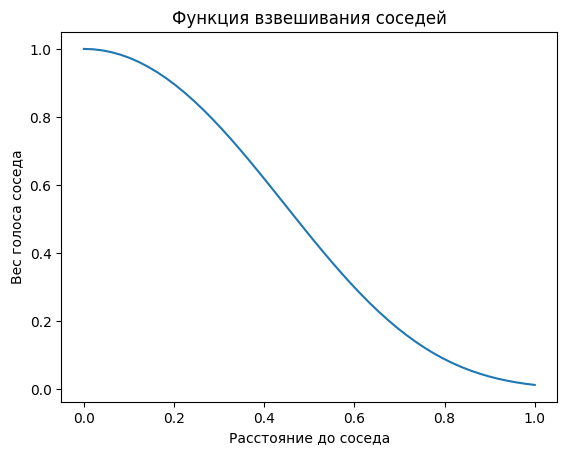

In [ ]:
x = np.linspace(0, 1)
plt.plot(x, distance2vote(x))
plt.xlabel('Расстояние до соседа')
plt.ylabel('Вес голоса соседа')
plt.title('Функция взвешивания соседей');

In [ ]:
from tqdm.auto import tqdm, trange

In [ ]:
words, vectors, synset_ids = [], [], []
for synset in tqdm(wn.synsets):
    if synset.part_of_speech != 'V':
        continue
    for sense in synset.senses:
        words.append(sense.name)
        vectors.append(vectorize(sense.name))
        synset_ids.append(synset.id)
vectors = np.stack(vectors)
tree = KDTree(vectors)

  0%|          | 0/59905 [00:00<?, ?it/s]

In [ ]:
votes = Counter()
dists, ids = tree.query(vectorize('кудахтать').reshape(1, -1), k=100)
for idx, distance in zip(ids[0], dists[0]):
    for hyper in wn[synset_ids[idx]].hypernyms:
        votes[hyper.id] += distance2vote(distance)
    print(words[idx], [t.title for t in wn[synset_ids[idx]].hypernyms])

КУДАХТАТЬ ['ИЗДАТЬ ЗВУК']
ПАХТАТЬ ['СБИТЬ В ПЛОТНУЮ МАССУ']
РАСКУДАХТАТЬСЯ ['ИЗДАТЬ ЗВУК']
КЛОХТАТЬ ['ИЗДАТЬ ЗВУК']
СБЕГАТЬ ТУДА И ОБРАТНО ['СХОДИТЬ ТУДА И ОБРАТНО']
БАРАХТАТЬСЯ ['ДВИЖЕНИЕ, ПЕРЕМЕЩЕНИЕ', 'ПЛЕСКАТЬСЯ В ВОДЕ']
СНОВАТЬ ТУДА-СЮДА ['ДВИЖЕНИЕ, ПЕРЕМЕЩЕНИЕ']
СХОДИТЬ ТУДА И ОБРАТНО ['ИДТИ НОГАМИ', 'ОБЕРНУТЬСЯ ТУДА И ОБРАТНО']
ПОДЛАТАТЬ ['ЗАШИТЬ ДЫРУ', 'НАШИТЬ СВЕРХУ']
ЗАНЫРНУТЬ ['ПОГРУЗИТЬСЯ В ЖИДКОСТЬ']
СНОВАТЬ ТУДА И ОБРАТНО ['ДВИЖЕНИЕ, ПЕРЕМЕЩЕНИЕ']
ПОПРЯТАТЬ ['ОБЕРЕГАТЬ, ЗАЩИЩАТЬ']
ПОПРЯТАТЬ ['НАКРЫТЬ, ПОКРЫТЬ СВЕРХУ']
СПЛАВАТЬ ТУДА И ОБРАТНО ['ПЛЫТЬ (ПЕРЕДВИГАТЬСЯ ПО ВОДЕ)', 'ПЛЫТЬ НА СУДНЕ', 'ОБЕРНУТЬСЯ ТУДА И ОБРАТНО']
РЫПАТЬСЯ ['ПЫТАТЬСЯ, СТАРАТЬСЯ', 'ХОТЕТЬ, ИМЕТЬ ЖЕЛАНИЕ']
СБЕГАТЬ И ВЕРНУТЬСЯ ['СХОДИТЬ ТУДА И ОБРАТНО']
БУРЧАТЬ ['ИЗДАТЬ ЗВУК']
БУРЧАТЬ ['БОРМОТАТЬ']
ПЕРЕБАРЫВАТЬ ['ПРЕОДОЛЕТЬ']
ПЕРЕБАРЫВАТЬ ['ПРЕВЗОЙТИ']
БРАТЬСЯ ['ПОЛУЧИТЬ В РАСПОРЯЖЕНИЕ']
БРАТЬСЯ ['ПОЯВИТЬСЯ, ВОЗНИКНУТЬ, НАЧАТЬСЯ']
БРАТЬСЯ ['НАЧАТЬ, ПРИСТУПИТЬ, ПРИНЯТЬСЯ', 'ОБЯЗАТЬСЯ']
БРАТЬСЯ ['БРАТЬ 

In [ ]:
for sid, score in votes.most_common(10):
    print(score,  wn[sid].title)

1.693910435463562 ИЗДАТЬ ЗВУК
0.4132547441687813 ДВИЖЕНИЕ, ПЕРЕМЕЩЕНИЕ
0.3097076148668363 СБИТЬ В ПЛОТНУЮ МАССУ
0.25169095401266095 СПУСТИТЬСЯ ВНИЗ
0.22120903181668677 СХОДИТЬ ТУДА И ОБРАТНО
0.20195221302283534 ОБЕРНУТЬСЯ ТУДА И ОБРАТНО
0.1896130809969685 ЗАШИТЬ ДЫРУ
0.1896130809969685 НАШИТЬ СВЕРХУ
0.18951210591007633 ИДТИ НОГАМИ
0.1778837765054719 КАЧАТЬ (КОЛЕБАТЬ)


# Найди лишнее
ДИВАН, ШКАФ, ЛАМПА, СТОЛ

In [ ]:
import math


def get_all_hypernyms(wn, word, max_level=100):
    """ Return dict of all hypernyms of a word and their distances """
    front = [sense.synset for sense in wn.get_senses(word)]
    levels = {}
    for level in range(max_level):
        if not front:
            break
        new_front = []
        for synset in front:
            if synset.id not in levels:
                levels[synset.id] = level
                new_front.extend(synset.hypernyms)
        front = new_front
    return levels

def get_closest_common(levels1, levels2):
    """ Find the closest common hypernym and sum of distances to it"""
    result = None
    result_distance = math.inf
    for id, distance in levels1.items():
        if id in levels2:
            total = distance + levels2[id]
            if total < result_distance:
                result_distance = total
                result = id
    return result, result_distance

In [ ]:
words = ['ДИВАН', 'ШКАФ', 'ЛАМПА', 'СТОЛ']
print('\t\t', '\t'.join(words))
for w1 in words:
    print(w1, end='\t')
    for w2 in words:
        n, d = get_closest_common(get_all_hypernyms(wn, w1), get_all_hypernyms(wn, w2))
        print(d, end='\t\t')
    print()

		 ДИВАН	ШКАФ	ЛАМПА	СТОЛ
ДИВАН	0		3		10		3		
ШКАФ	3		0		5		2		
ЛАМПА	10		5		0		7		
СТОЛ	3		2		7		0		


In [ ]:
name, distance = get_closest_common(get_all_hypernyms(wn, 'лампа'), get_all_hypernyms(wn, 'шкаф'))
print(distance, name, wn[name].title)

5 106555-N ТЕХНИЧЕСКОЕ УСТРОЙСТВО


In [ ]:
for k, v in get_all_hypernyms(wn, 'лампа').items():
    print(k, v, wn[k])

128561-N 0 Synset(id="128561-N", title="ОСВЕТИТЕЛЬНЫЙ ПРИБОР")
8785-N 0 Synset(id="8785-N", title="ЭЛЕКТРИЧЕСКАЯ ЛАМПА")
107646-N 1 Synset(id="107646-N", title="ИСТОЧНИК ОСВЕЩЕНИЯ")
4222-N 1 Synset(id="4222-N", title="СВЕТОТЕХНИЧЕСКОЕ ОБОРУДОВАНИЕ")
106488-N 2 Synset(id="106488-N", title="ИСХОДНЫЙ ПУНКТ")
2070-N 2 Synset(id="2070-N", title="ЭЛЕКТРОТЕХНИЧЕСКОЕ ОБОРУДОВАНИЕ")
106613-N 3 Synset(id="106613-N", title="РОЛЬ, ПОЛОЖЕНИЕ, МЕСТО")
149201-N 3 Synset(id="149201-N", title="ИНЖЕНЕРНОЕ ОБОРУДОВАНИЕ")
106555-N 4 Synset(id="106555-N", title="ТЕХНИЧЕСКОЕ УСТРОЙСТВО")
1320-N 4 Synset(id="1320-N", title="ОБОРУДОВАНИЕ")
106553-N 5 Synset(id="106553-N", title="ПРИСПОСОБЛЕНИЕ (ПРЕДМЕТ)")
106554-N 6 Synset(id="106554-N", title="ПРЕДМЕТ, ВЕЩЬ")
147133-N 7 Synset(id="147133-N", title="ФИЗИЧЕСКИЙ ОБЪЕКТ")
147134-N 8 Synset(id="147134-N", title="ФИЗИЧЕСКАЯ СУЩНОСТЬ")
153782-N 9 Synset(id="153782-N", title="ПОСТОЯННАЯ СУЩНОСТЬ")


In [ ]:
wn["149201-N"].hypernyms

[Synset(id="106555-N", title="ТЕХНИЧЕСКОЕ УСТРОЙСТВО"),
 Synset(id="1320-N", title="ОБОРУДОВАНИЕ")]

In [ ]:
for k, v in get_all_hypernyms(wn, 'стол').items():
    print(k, v, wn[k])

146834-N 0 Synset(id="146834-N", title="СТОЛ ДЛЯ ЕДЫ")
107294-N 0 Synset(id="107294-N", title="СТОЛ")
106554-N 1 Synset(id="106554-N", title="ПРЕДМЕТ, ВЕЩЬ")
1253-N 1 Synset(id="1253-N", title="МЕБЕЛЬ")
147133-N 2 Synset(id="147133-N", title="ФИЗИЧЕСКИЙ ОБЪЕКТ")
130019-N 2 Synset(id="130019-N", title="НЕПРОДОВОЛЬСТВЕННЫЕ ТОВАРЫ")
146828-N 2 Synset(id="146828-N", title="ПРЕДМЕТ ИНТЕРЬЕРА")
9059-N 2 Synset(id="9059-N", title="ПРОДУКЦИЯ ДЕРЕВООБРАБОТКИ")
147134-N 3 Synset(id="147134-N", title="ФИЗИЧЕСКАЯ СУЩНОСТЬ")
1252-N 3 Synset(id="1252-N", title="ПОТРЕБИТЕЛЬСКИЕ ТОВАРЫ")
56-N 3 Synset(id="56-N", title="ПРОМЫШЛЕННАЯ ПРОДУКЦИЯ")
562-N 3 Synset(id="562-N", title="ТОВАР")
106507-N 3 Synset(id="106507-N", title="ПРОДУКТ ПРОИЗВОДСТВА")
153782-N 4 Synset(id="153782-N", title="ПОСТОЯННАЯ СУЩНОСТЬ")
106505-N 4 Synset(id="106505-N", title="ПРОДУКТ ТРУДА")


# Word sense disambiguation

зАмок или замОк ?

Примитивный алгоритм: для каждого значения находим синонимы и проверяем, какие ближе по fasttext-эмбеддингу к словам контекста.

Для верности, стоило бы кроме синонимов взять ещё и ко-гипонимы.

In [ ]:
!pip install razdel
import razdel

In [ ]:
context = '''Сначала шов слегка уплотняем молоточком, затем прочеканиваем на нём замок
― бороздку, называемую "зигом", которая будет препятствовать расхождению шва при дальнейшем его уплотнении.'''
word = 'замок'

In [ ]:
def disambiguate(word, context):
    candidates = [s.synset for s in wn[word]]
    text_vector = vectorize(' '.join(t.text for t in razdel.tokenize(context) if t.text != word))
    candidate_vectors = [
        vectorize(' '.join(w for s in c.senses for w in s.name.lower().split() if name != word))
        for c in candidates
    ]
    scores = [np.dot(text_vector, v) for v in candidate_vectors]
    return dict(zip(scores, candidates))

disambiguate(word, context)

{0.4421322748905842: Synset(id="126228-N", title="СРЕДНЕВЕКОВЫЙ ЗАМОК"),
 0.55319632362594: Synset(id="114707-N", title="ЗАМОК ДЛЯ ЗАПИРАНИЯ")}

In [ ]:
context = '''Издали видны королевский замок Вавель и кафедральный собор Святых Вацлава и Станислава
― настоящие шедевры зодчества.'''
disambiguate(word, context)

{0.6623339070392336: Synset(id="126228-N", title="СРЕДНЕВЕКОВЫЙ ЗАМОК"),
 0.5569728387813146: Synset(id="114707-N", title="ЗАМОК ДЛЯ ЗАПИРАНИЯ")}